In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("C:\\Users\\User\\Downloads\\pfizer and nbiotech sentimental analysis\\vaccination_tweets.csv")
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


Dropping all the columns except 'text' for analysising reviews

In [2]:
df_copy=df.copy()           #creating a copy to perform EDA on the other features

In [3]:
drop_features=df.drop('text',axis=1)


In [4]:
drop_features=list(drop_features.columns)
print(drop_features)

['id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet']


In [5]:
df=df.drop(drop_features,axis=1)
df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


Cleaning Text

In [6]:
import re
import string

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [32]:
def cleaning(sent):
    sent = re.sub('@\w*', ' ', sent)  #remove mentions
    sent = re.sub('http*\S+', ' ', sent)   #remove URL
    sent = re.sub('#\w*', ' ', sent)   #remove hashtags 
    sent = re.sub('\'\w+', ' ', sent)   #remove ticks
    sent = re.sub(r'\w*\d+\w*', ' ', sent)  #remove numbers
    sent = str(sent).lower()
    sent = re.sub('\s{2,}', ' ', sent)     #replace overspace
    return sent

df['text'] = df['text'].apply(lambda x:cleaning(x))

In [33]:
df.head()


,text
0,same folks said daikon paste could treat a cyt...
1,while the world has been on the wrong side of ...
2,russian vaccine is created to last - years
3,"facts are immutable, senator, even when you no..."
4,explain to me again why we need a vaccine


In [10]:
df['text'] = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,Russian vaccine is created to last - years
3,"Facts are immutable, Senator, even when you no..."
4,Explain to me again why we need a vaccine


Removing stopwords and performing Lemmatization

In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [38]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatizer(text):
    text = [wnl.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

In [48]:
df.head()

,text,tokenized,No_stopwords,lemmatized
0,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt...","[folk, said, daikon, paste, could, treat, cyto..."
1,while the world has been on the wrong side of ...,"[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,...","[world, wrong, side, history, year, hopefully,..."
2,russian vaccine is created to last - years,"[, russian, vaccine, is, created, to, last, ye...","[, russian, vaccine, created, last, years, ]","[, russian, vaccine, created, last, year, ]"
3,"facts are immutable, senator, even when you no...","[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, ethically, s...","[fact, immutable, senator, even, ethically, st..."
4,explain to me again why we need a vaccine,"[explain, to, me, again, why, we, need, a, vac...","[explain, need, vaccine, ]","[explain, need, vaccine, ]"


Did not removed punctuations because of VADER SENTIMENT ANALYSIS SCORES and analysis are affected by factors like punctuations,capitalization,preceeding-trigrams,degree modifiers,conjunctions etc.

In [49]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyze=SentimentIntensityAnalyzer()

In [51]:
for i in range(len(df)):
    print(analyze.polarity_scores(df['text'][i]))
    

{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}
{'neg': 0.13, 'neu': 0.756, 'pos': 0.113, 'compound': -0.1027}
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.25}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.7003}
{'neg': 0.121, 'neu': 0.623, 'pos': 0.257, 'compound': 0.5423}
{'neg': 0.068, 'neu': 0.518, 'pos': 0.414, 'compound': 0.8933}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'compound': 0.7003}
{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu

{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.4926}
{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'compound': 0.8832}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.127, 'neu': 0.543, 'pos': 0.33, 'compound': 0.5423}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.25}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.5423}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.509, 'pos': 0.491, 'compound': 0.4389}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5267}
{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.4767}
{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.2023}
{'neg': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}
{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.6908}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.53, 'neu': 0.47, 'pos': 0.0, 'compound': -0.7845}
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}
{'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'compound': -0.5859}
{'neg': 0.12, 'neu': 0.761, 'pos': 0.12, 'compound': 0.0}
{'neg': 0.15, 'neu': 0.73, 'pos': 0.12, 'compound': -0.1779}
{'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.5859}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.155, 'neu': 0.728, 'pos': 0.117, 'compound': -0.2023}
{'neg': 0.096, 'neu': 0.702, 'pos': 0.202, 'compound': 0.34}
{'neg': 0.098, 'neu': 0.759, 'pos': 0.143

{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.5423}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5423}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.6908}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'compound': 0.8271}
{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.7783}
{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.6115}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.7096}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}
{'neg': 0.0

{'neg': 0.0, 'neu': 0.364, 'pos': 0.636, 'compound': 0.5423}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.114, 'neu': 0.751, 'pos': 0.134, 'compound': 0.1298}
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.7783}
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4215}
{'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.142, 'neu': 0.71, 'pos': 0.148, 'compound': 0.0258}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6705}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.0772}
{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.4588}
{'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound': -0.4588}
{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.5267}
{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.4767}
{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.4199}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.8122}
{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.6124}
{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.5574}
{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg':

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.6908}
{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.7783}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.17, 'neu': 0.83, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.5935}
{'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'compound': -0.4588}
{'neg': 0.141, 'neu': 0.707, 'pos': 0.152, 'compound': 0.0516}
{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.4767}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.8682}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.5411}
{'neg': 0.072, 'neu': 0.771, 'pos': 0.157, 'compound': 0.4118}
{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.449, 'neu': 0.551, 'pos': 0.0, 'compound': -0.6908}
{'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'compound': 0.8723}

{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.4497}
{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.0772}
{'neg': 0.071, 'neu': 0.929, 'pos': 0.0, 'compound': -0.1531}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.276, 'neu': 0.607, 'pos': 0.117, 'compound': -0.5267}
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.6124}
{'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compound': 0.9053}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.128, 'neu': 0.776, 'pos': 0.096, 'compound': -0.1779}
{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.8679}
{'n

{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.152, 'neu': 0.848, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'compound': 0.8001}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.4767}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.116, 'neu': 0.741, 'pos': 0.143, 'compound': 0.128}
{'neg': 0.147, 'neu': 0.603, 'pos': 0.25, 'compound': 0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.5095}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 

{'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.6115}
{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.5256}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.7644}
{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.4767}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.8001}
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.8302}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.4926}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.0909}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.2023}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.765}
{

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4391}
{'neg': 0.203, 'neu': 0.717, 'pos': 0.08, 'compound': -0.2263}
{'neg': 0.095, 'neu': 0.798, 'pos': 0.106, 'compound': 0.0772}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.6597}
{'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compound': -0.4588}
{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.743}
{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.8625}
{'neg': 0.0, 'neu': 0.396, 'pos': 0.604, 'compound': 0.847}
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0

{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.5423}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.7999}
{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4767}
{'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.8718}
{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4588}
{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.7506}
{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3182}
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.6222}
{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.8271}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.52

{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.6214}
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.5697}
{'neg': 0.208, 'neu': 0.636, 'pos': 0.156, 'compound': -0.2263}
{'neg': 0.203, 'neu': 0.642, 'pos': 0.155, 'compound': 0.0258}
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.4753}
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.128}
{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.5594}
{'neg': 0.077, 'neu': 0.735, 'pos': 0.188, 'compound': 0.3612}
{'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.165, 'neu': 0.688, 'pos': 0.147, 'compound': -0.1027}
{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.7096}
{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4404}
{'neg': 0.0, 'neu': 

{'neg': 0.074, 'neu': 0.786, 'pos': 0.14, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.6908}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.3252}
{'neg': 0.092, 'neu': 0.763, 'pos': 0.145, 'compound': 0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.226, 'neu': 0.484, 'pos': 0.29, 'compound': 0.2006}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.122, 'neu': 0.759, 'pos': 0.118, 'compound': -0.0258}
{'neg': 0.337, 'neu': 0.663, 'pos': 0.0, 'compound': -0.7264}
{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'compound': 0.1901}
{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.

{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.5256}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.6697}
{'neg': 0.173, 'neu': 0.724, 'pos': 0.103, 'compound': -0.3071}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.2023}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}
{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.2975}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.2732}
{'neg': 0.137, 'neu': 0.714, 'pos': 0.149, 'compound': 0.0516}

In [53]:
import numpy as np
import pandas as pd 
scores=[]
for i in range(len(df)):
    
    score = analyze.polarity_scores(df['text'][i])
    score=score['compound']
    scores.append(float(score))
sentiment=[]
for k in scores:
    if k>=0.05:
        sentiment.append("Positive")
    elif k>-0.05 and k<0.05 :
        sentiment.append("Neutral")
    elif k<=-0.05:
        sentiment.append("Negative")
df['sentiment']=pd.Series(np.array(sentiment))


In [54]:
df.head()

,text,tokenized,No_stopwords,lemmatized,sentiment
0,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt...","[folk, said, daikon, paste, could, treat, cyto...",Positive
1,while the world has been on the wrong side of ...,"[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,...","[world, wrong, side, history, year, hopefully,...",Negative
2,russian vaccine is created to last - years,"[, russian, vaccine, is, created, to, last, ye...","[, russian, vaccine, created, last, years, ]","[, russian, vaccine, created, last, year, ]",Positive
3,"facts are immutable, senator, even when you no...","[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, ethically, s...","[fact, immutable, senator, even, ethically, st...",Neutral
4,explain to me again why we need a vaccine,"[explain, to, me, again, why, we, need, a, vac...","[explain, need, vaccine, ]","[explain, need, vaccine, ]",Neutral


Performing EDA

In [55]:
from matplotlib import pyplot as plt


In [56]:
count=df.groupby('sentiment').count()
print(count)

           text  tokenized  No_stopwords  lemmatized
sentiment                                           
Negative    673        673           673         673
Neutral    1491       1491          1491        1491
Positive   1519       1519          1519        1519


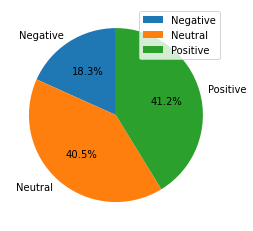

In [58]:
count=[673,1491,1519]
plt.pie(count,labels=['Negative',"Neutral",'Positive'],startangle=90,autopct='%1.1f%%')
plt.legend()
plt.show()

In [61]:
df_copy.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
